<a href="https://colab.research.google.com/github/anibahs/DSEM_INFO6105/blob/main/ml_data_cleaning_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

!pip install eli5
! pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 7.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d551ed3283eb1afcb20b08bf594de5b8aad57cfd4624d5712032edbcafcf171d
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

# Download API Key to download dataset from Kaggle

In [4]:
import os

os.environ['KAGGLE_USERNAME'] = 'shabinasingh'
os.environ['KAGGLE_KEY'] = '4a64d2f32a2dec68f1b905c88bb66932'



In [5]:
! mkdir ~/.kaggle

In [6]:
#from google.colab import files
#files.upload()

#with open('~/.kaggle/kaggle.json', 'w') as writefile:
#    writefile.write('{"username":"shabinasingh","key":"4a64d2f32a2dec68f1b905c88bb66932"}')
#! echo '{"username":"shabinasingh","key":"4a64d2f32a2dec68f1b905c88bb66932"}' > ~/.kaggle/kaggle.json
#! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset                Hotel Reservations Dataset                          480KB  2023-01-04 12:50:31           7167        253  1.0              
themrityunjaypathak/most-subscribed-1000-youtube-channels        Most Subscribed 1000 Youtube Channels                28KB  2023-01-21 14:42:05           1260         43  1.0              
senapatirajesh/netflix-tv-shows-and-movies                       Latest Netflix TV shows and movies                    1MB  2023-01-14 17:03:12           2634         69  0.9411765        
ulrikthygepedersen/online-retail-dataset               

# Download data set

In [7]:
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package


 78% 3.00M/3.83M [00:00<00:00, 5.56MB/s]
100% 3.83M/3.83M [00:00<00:00, 5.75MB/s]


# Decompress dataset to csv

In [38]:
! unzip weather-dataset-rattle-package.zip -d /content

Archive:  weather-dataset-rattle-package.zip
replace /content/weatherAUS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/weatherAUS.csv  


# Read CSV into dataframe using pandas library

In [42]:
data = '/content/weatherAUS.csv'
df = pd.read_csv(data)

In [43]:
print(len(df))

145460


Dependent variable - RainTomorrow
this variable will be used to predict if it will rain tomorrow or not, this is a categorical data type with two values - "Yes" and "No"

In [44]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# What are the data types? (Only numeric and categorical)

In [45]:
print(df.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


**Finding more information on categorical features**

In [46]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316



**Finding more information on numeric features**

In [47]:
numerical_columns = df.select_dtypes(include=['int','float','float64']).columns
print(df[numerical_columns].describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

# Are there missing values?

In [48]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Sunshine,69835,0.480098
Evaporation,62790,0.431665
Cloud3pm,59358,0.408071
Cloud9am,55888,0.384216
Pressure9am,15065,0.103568
Pressure3pm,15028,0.103314
WindDir9am,10566,0.072639
WindGustDir,10326,0.070989
WindGustSpeed,10263,0.070555
Humidity3pm,4507,0.030984


In [49]:
df = df.dropna()
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Date,0,0.0
WindSpeed3pm,0,0.0
RainToday,0,0.0
Temp3pm,0,0.0
Temp9am,0,0.0
Cloud3pm,0,0.0
Cloud9am,0,0.0
Pressure3pm,0,0.0
Pressure9am,0,0.0
Humidity3pm,0,0.0


We need to impute these missing values using mean/median/mode or MICE/KNN

# What are the likely distributions of the numerical variables?

MinTemp


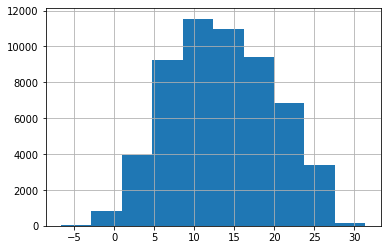

MaxTemp


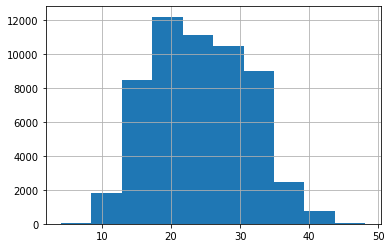

Rainfall


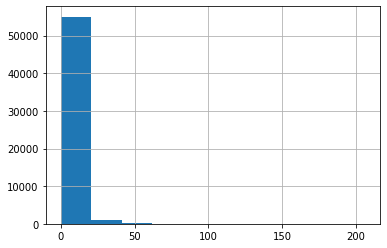

Evaporation


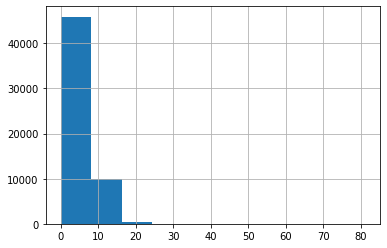

Sunshine


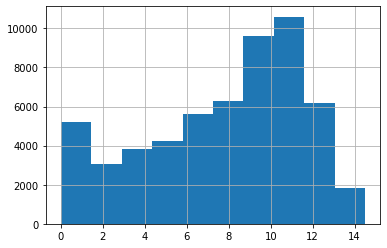

WindGustSpeed


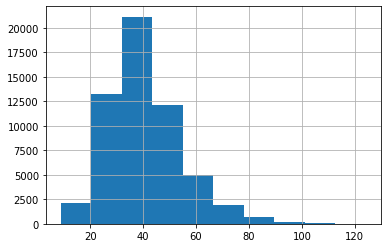

WindSpeed9am


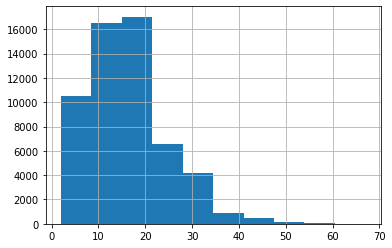

WindSpeed3pm


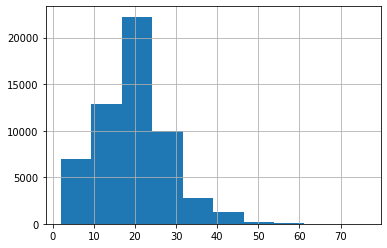

Humidity9am


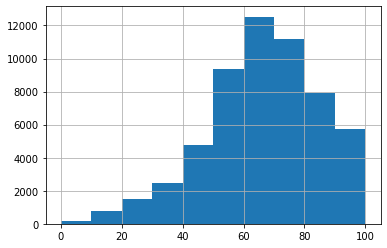

Humidity3pm


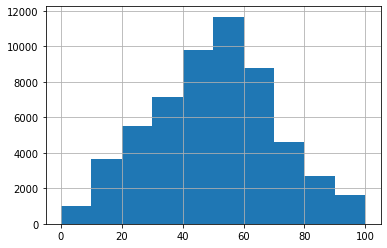

Pressure9am


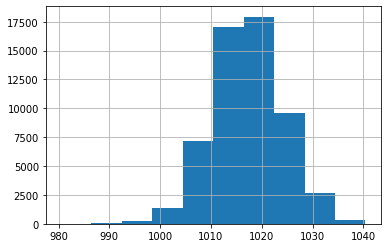

Pressure3pm


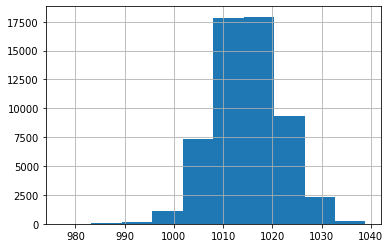

Cloud9am


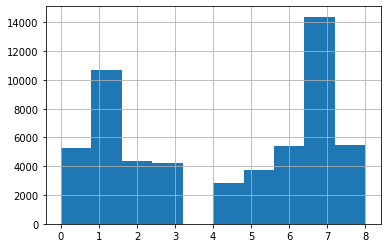

Cloud3pm


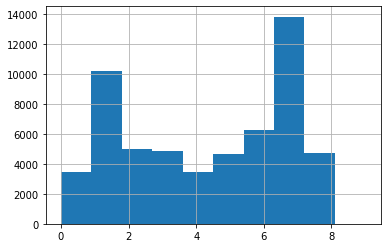

Temp9am


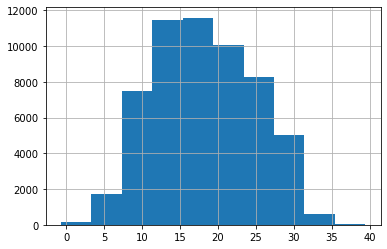

Temp3pm


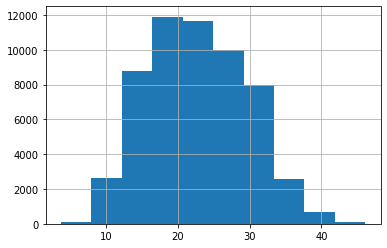

In [50]:
for i, column in enumerate(df[numerical_columns]):
    print(column)
    plt.figure(i)
    df[column].hist()
    plt.show()


Bimodal Distributions - Sunshine, Cloud9am, Cloud3pm


Normal Distribution with Skewness - MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity93pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm


Exponential Distributino - Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm


# QQ Plot to find likely distribution of numerical values

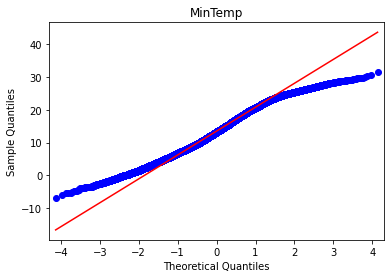

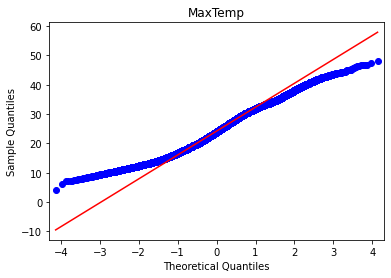

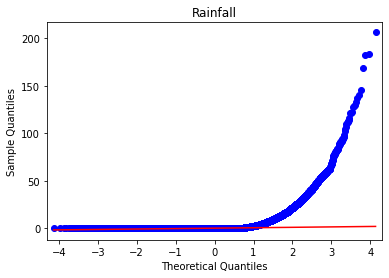

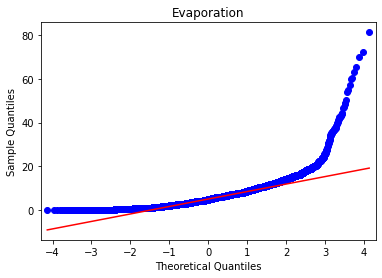

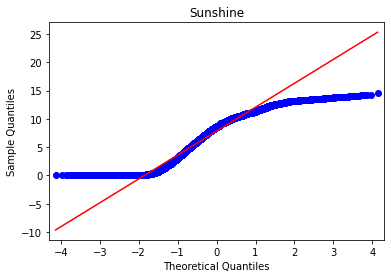

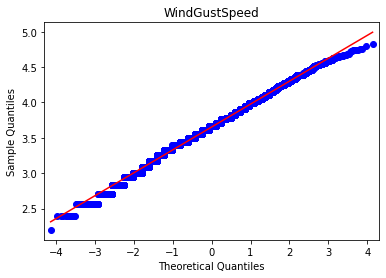

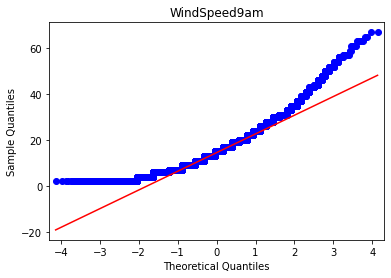

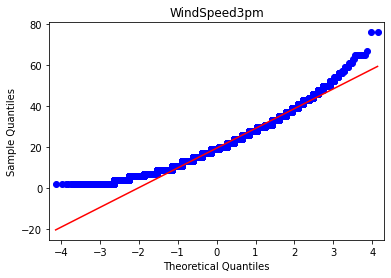

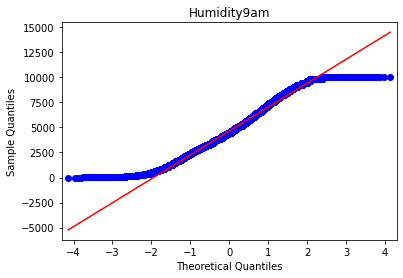

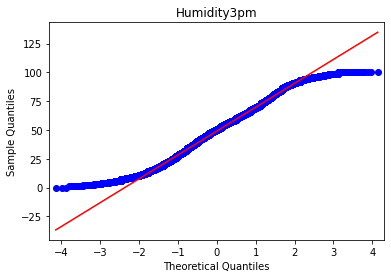

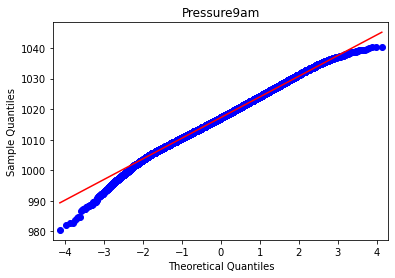

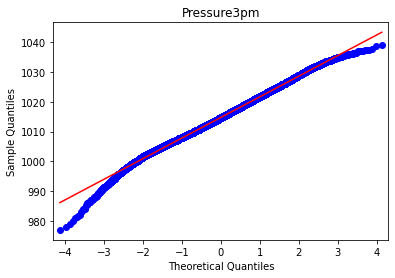

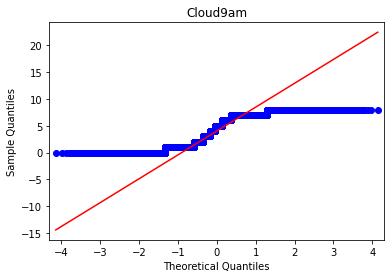

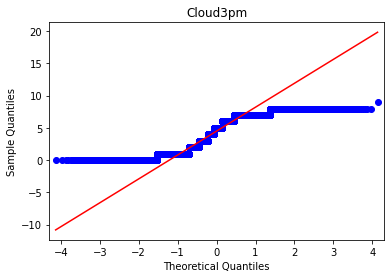

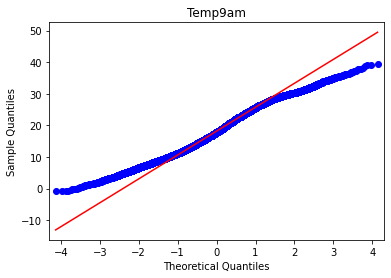

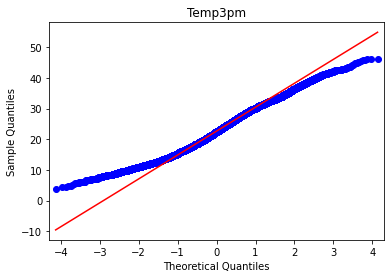

In [55]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

for column in df[numerical_columns]:
    sm.qqplot(df[column], line='q')
    pylab.title(column)
    pylab.show()

# To correct skewness in Normal Distribution

In [51]:
nd_features = ["MinTemp", "MaxTemp", "WindGustSpeed", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]
print(df[nd_features].skew(axis=0).round(2))

MinTemp          0.05
MaxTemp          0.19
WindGustSpeed    0.96
Humidity9am     -0.49
Humidity3pm      0.01
Pressure9am     -0.06
Pressure3pm     -0.00
Temp9am          0.11
Temp3pm          0.20
dtype: float64


In [52]:
# We need to reduce skewness using square root / log approach 
df["WindGustSpeed"] = np.log(df["WindGustSpeed"])
df["Humidity9am"] = np.square(df["Humidity9am"])


In [53]:
print(df[nd_features].skew(axis=0).round(2))

MinTemp          0.05
MaxTemp          0.19
WindGustSpeed   -0.10
Humidity9am      0.27
Humidity3pm      0.01
Pressure9am     -0.06
Pressure3pm     -0.00
Temp9am          0.11
Temp3pm          0.20
dtype: float64


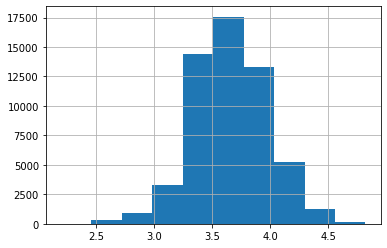

In [54]:
plt.figure()
df["WindGustSpeed"].hist()
plt.show()

# For Bimodal Distribution

In [22]:
bimodal_features = ["Sunshine", "Cloud9am", "Cloud3pm"]



# For Exponential Distribution

# Hide

TypeError: ignored

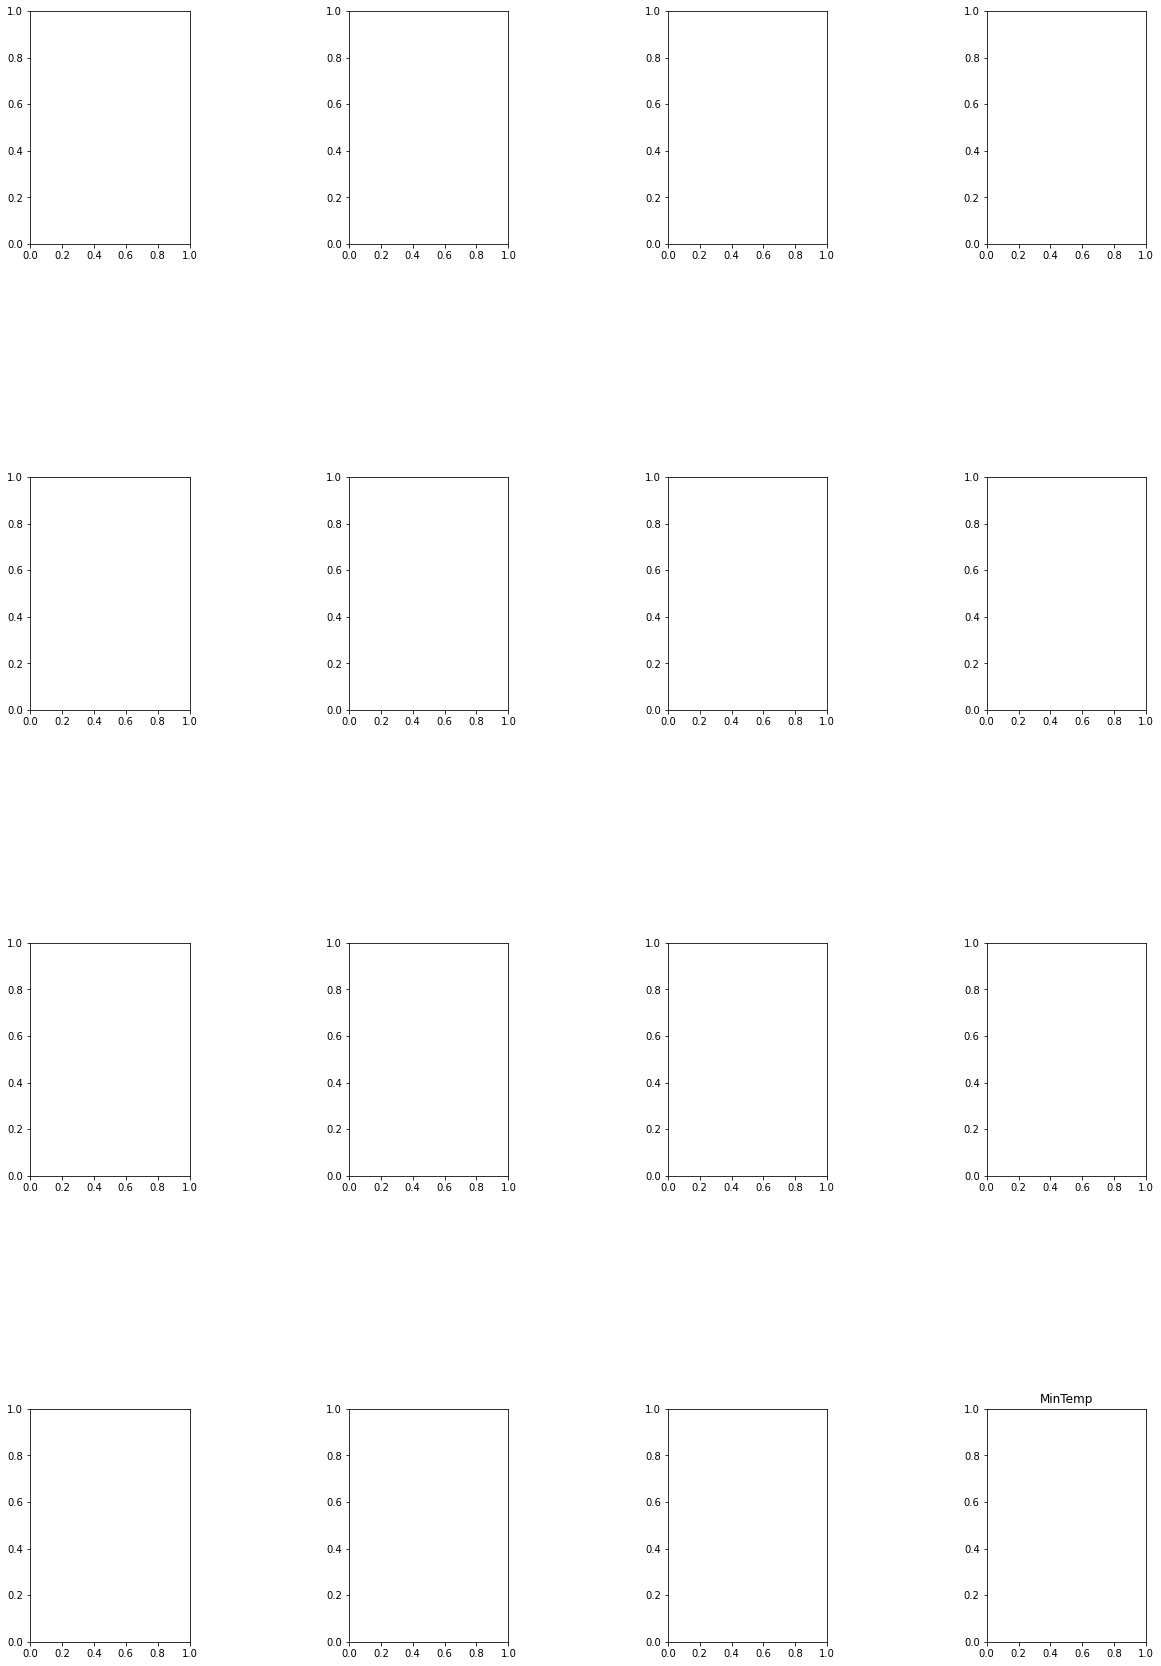

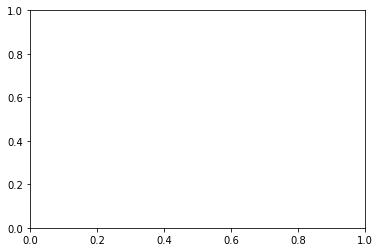

In [23]:
a=4
b=4
fig, axs = plt.subplots(nrows=a, ncols=b, figsize=(20, 30))
plt.subplots_adjust(hspace=1,wspace=1)

#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
#df[numerical_columns].hist(ax = ax)

#fig,ax = plt.subplots(1,len(df[numerical_columns]))
#axe = axs.ravel()
for i, column in enumerate(df[numerical_columns]):
    for i in range(a):
      for j in range(b):
        plt.title(column)
        fig = plt.figure()
        ax = fig.gca()
        df[column].hist(ax=ax[i,j])


# What are the likely distributions of the categorical variables?

In [57]:
for column in df[categorical_columns]:

  # Calculate the frequency of each category
  freq = df[column].value_counts()
  print(column)
  # Print the frequency of each category
  print(freq)
  print("")

Date
2010-11-16    25
2009-03-09    25
2009-03-28    25
2009-03-26    25
2010-05-17    25
              ..
2008-03-26     1
2008-03-25     1
2008-03-24     1
2008-03-23     1
2008-01-02     1
Name: Date, Length: 3416, dtype: int64

Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

WindGustDir
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     

In [61]:
for column in df[categorical_columns]:
  freq = df[column].value_counts(normalize=True)
  print(column)
  print(freq)
  print("")

Date
2010-11-16    0.000443
2009-03-09    0.000443
2009-03-28    0.000443
2009-03-26    0.000443
2010-05-17    0.000443
                ...   
2008-03-26    0.000018
2008-03-25    0.000018
2008-03-24    0.000018
2008-03-23    0.000018
2008-01-02    0.000018
Name: Date, Length: 3416, dtype: float64

Location
Darwin              0.054272
Perth               0.053616
Brisbane            0.052340
MelbourneAirport    0.051914
PerthAirport        0.051631
SydneyAirport       0.050868
Watsonia            0.048387
Mildura             0.045977
MountGambier        0.043690
NorfolkIsland       0.043672
Cairns              0.043318
Townsville          0.042875
WaggaWagga          0.042822
AliceSprings        0.039401
Nuriootpa           0.035590
Hobart              0.034367
Moree               0.033906
Melbourne           0.033641
Portland            0.033020
Woomera             0.030734
Sydney              0.029954
Sale                0.029741
CoffsHarbour        0.024459
Williamtown         0.02

# Which independent variables are useful to predict a target (dependent variable)?

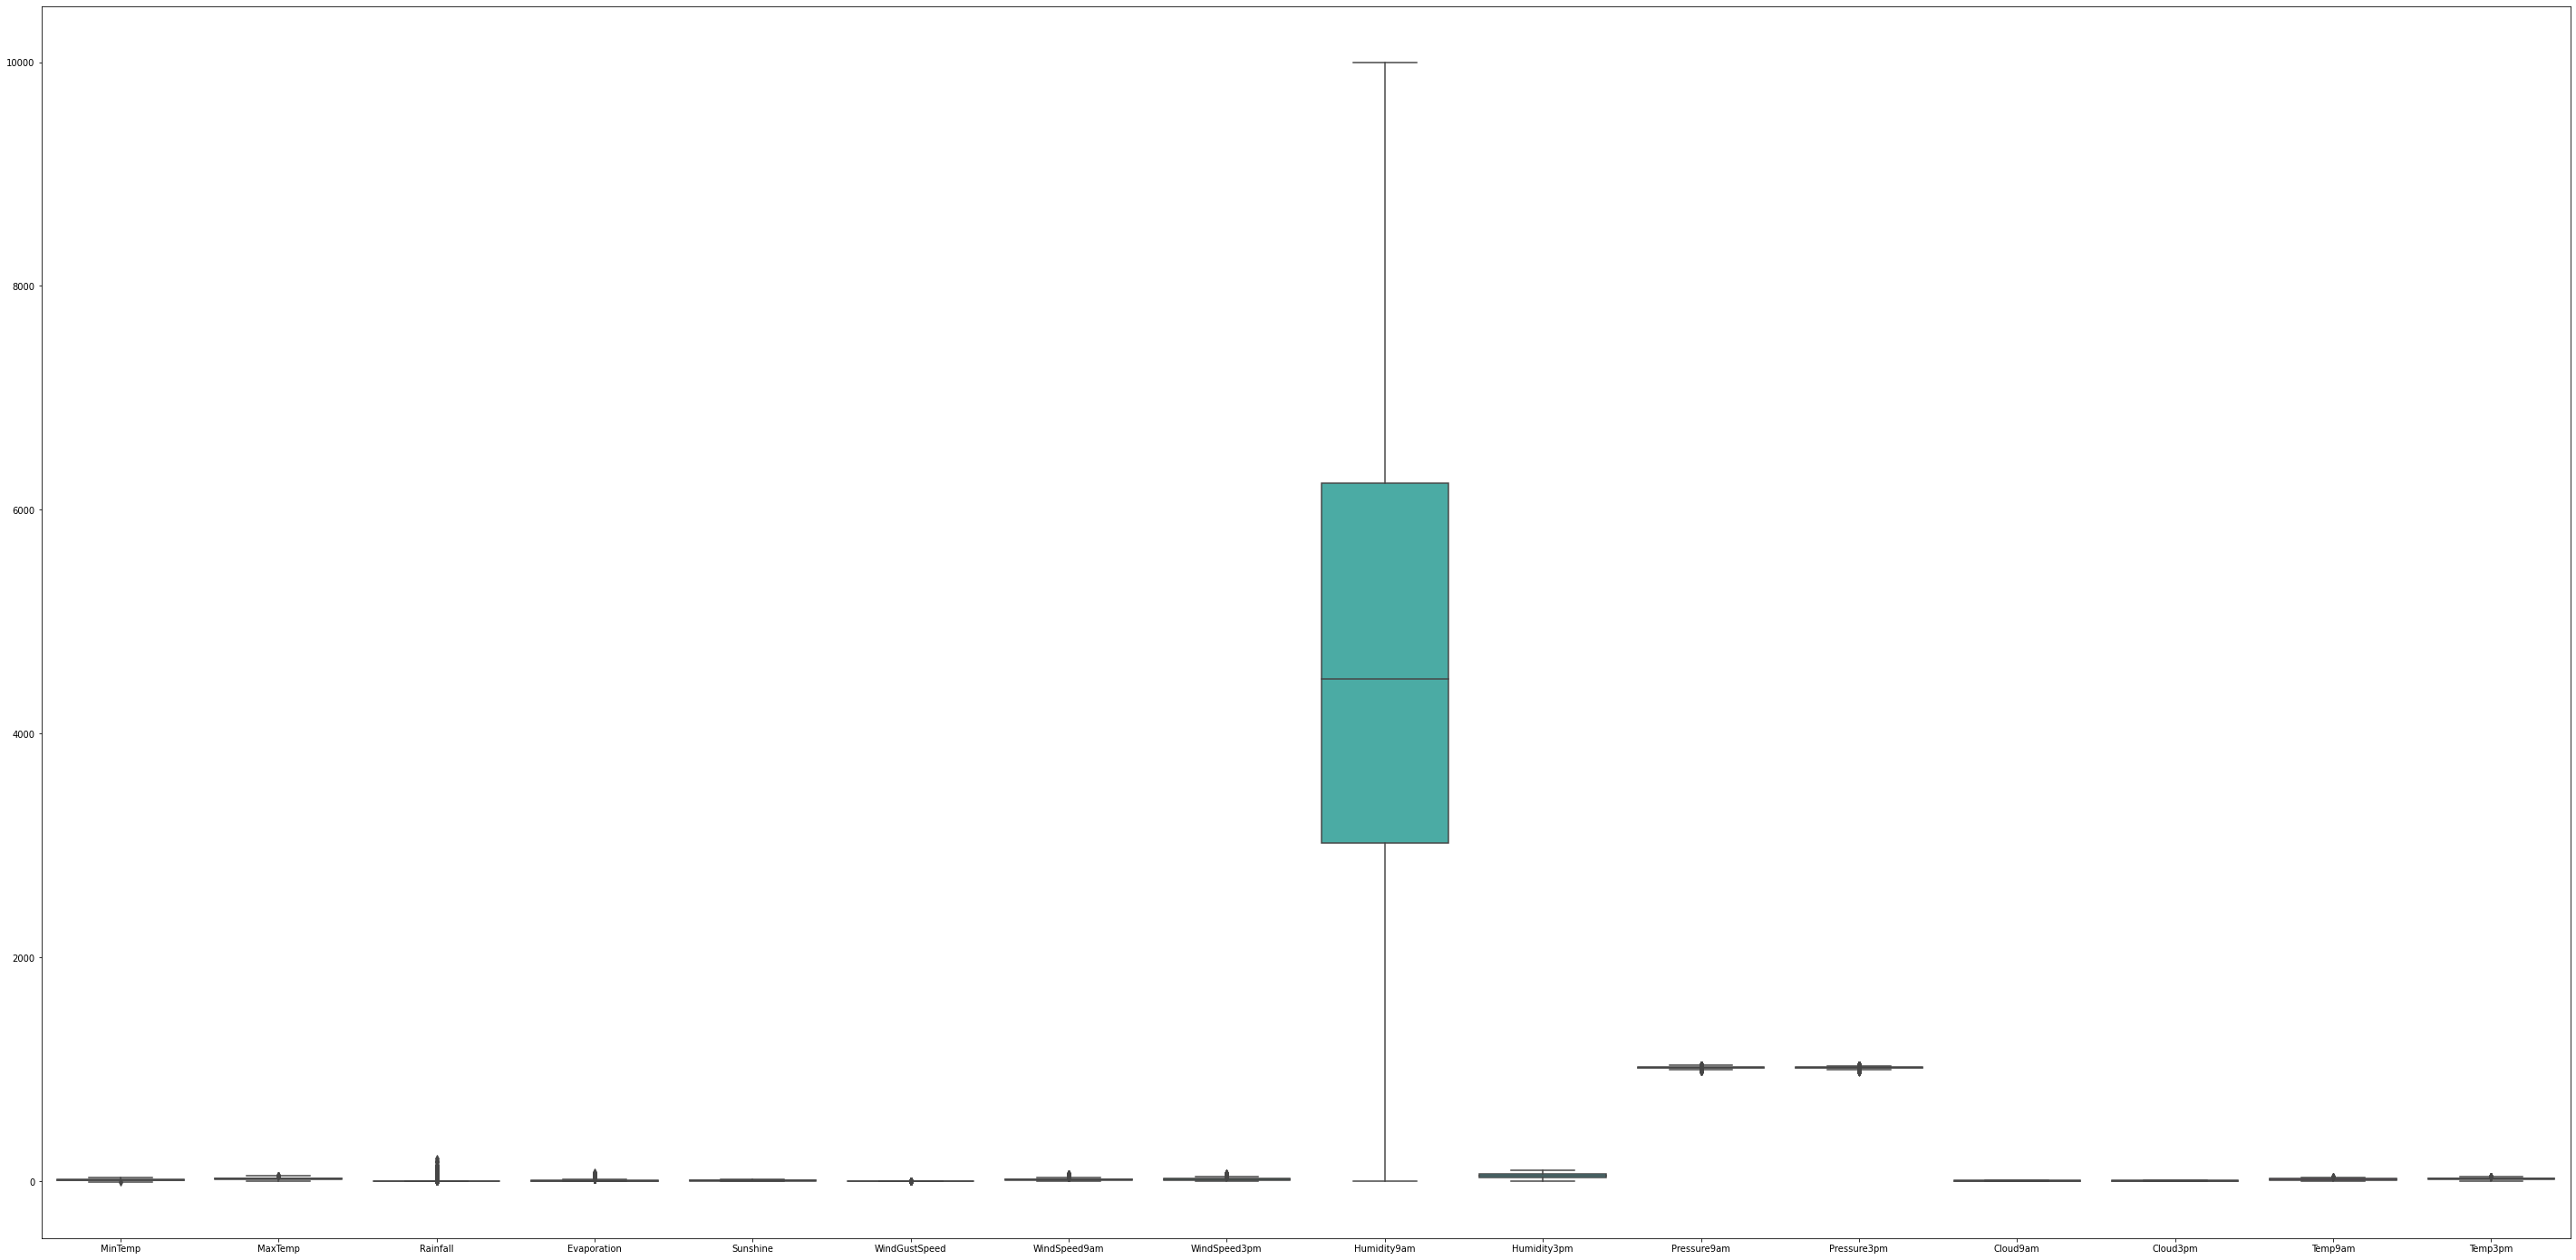

In [62]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(50,25))
sns.boxplot(data=df)

In [65]:
#df_short = df.drop(['Date', 'Location','WindGustDir', 'WindDir9am','WindDir3pm','RainToday'],axis=1)
#df_short = df[numerical_columns]
#df_short = pd.get_dummies(df_short)
from sklearn import preprocessing

# Create x to store scaled values as floats
x1 = df[['Humidity9am']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x1_scaled = min_max_scaler.fit_transform(x1)

# Run the normalizer on the dataframe
df[['Humidity9am']] = pd.DataFrame(x1_scaled)


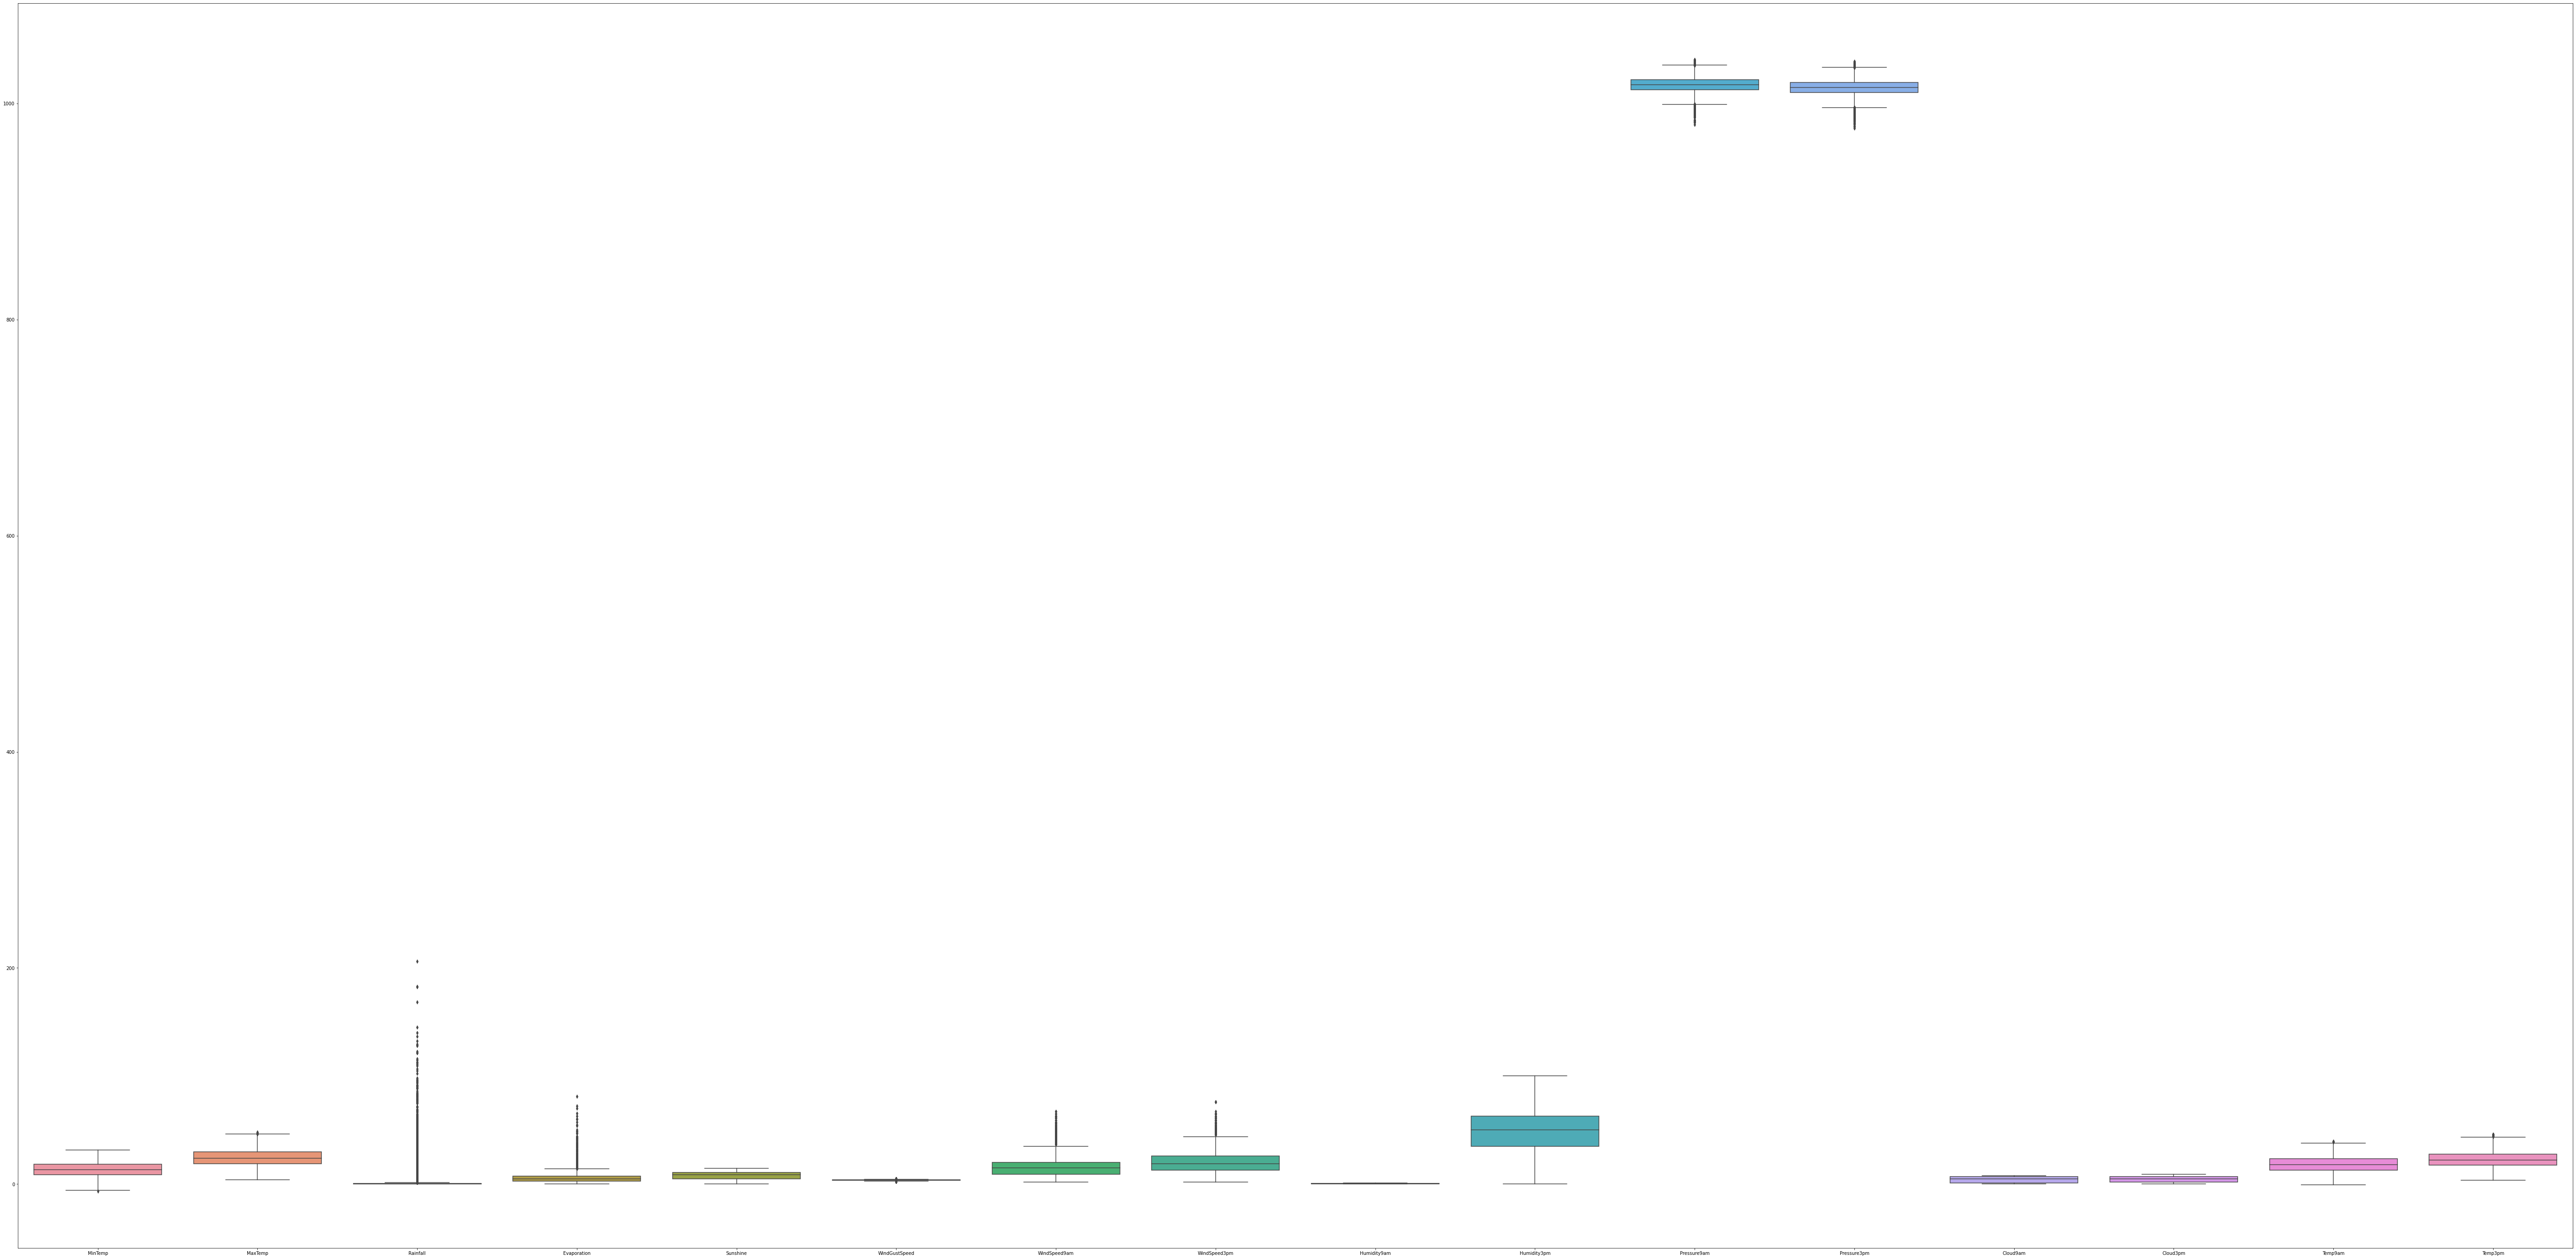

In [67]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(100,50))
sns.boxplot(data=df)

In [68]:
# Create x to store scaled values as floats
x1 = df[['Pressure9am']].values.astype(float)
x2 = df[['Pressure3pm']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x1_scaled = min_max_scaler.fit_transform(x1)
x2_scaled = min_max_scaler.fit_transform(x2)

# Run the normalizer on the dataframe
df[['Pressure9am']] = pd.DataFrame(x1_scaled)
df[['Pressure3pm']] = pd.DataFrame(x2_scaled)

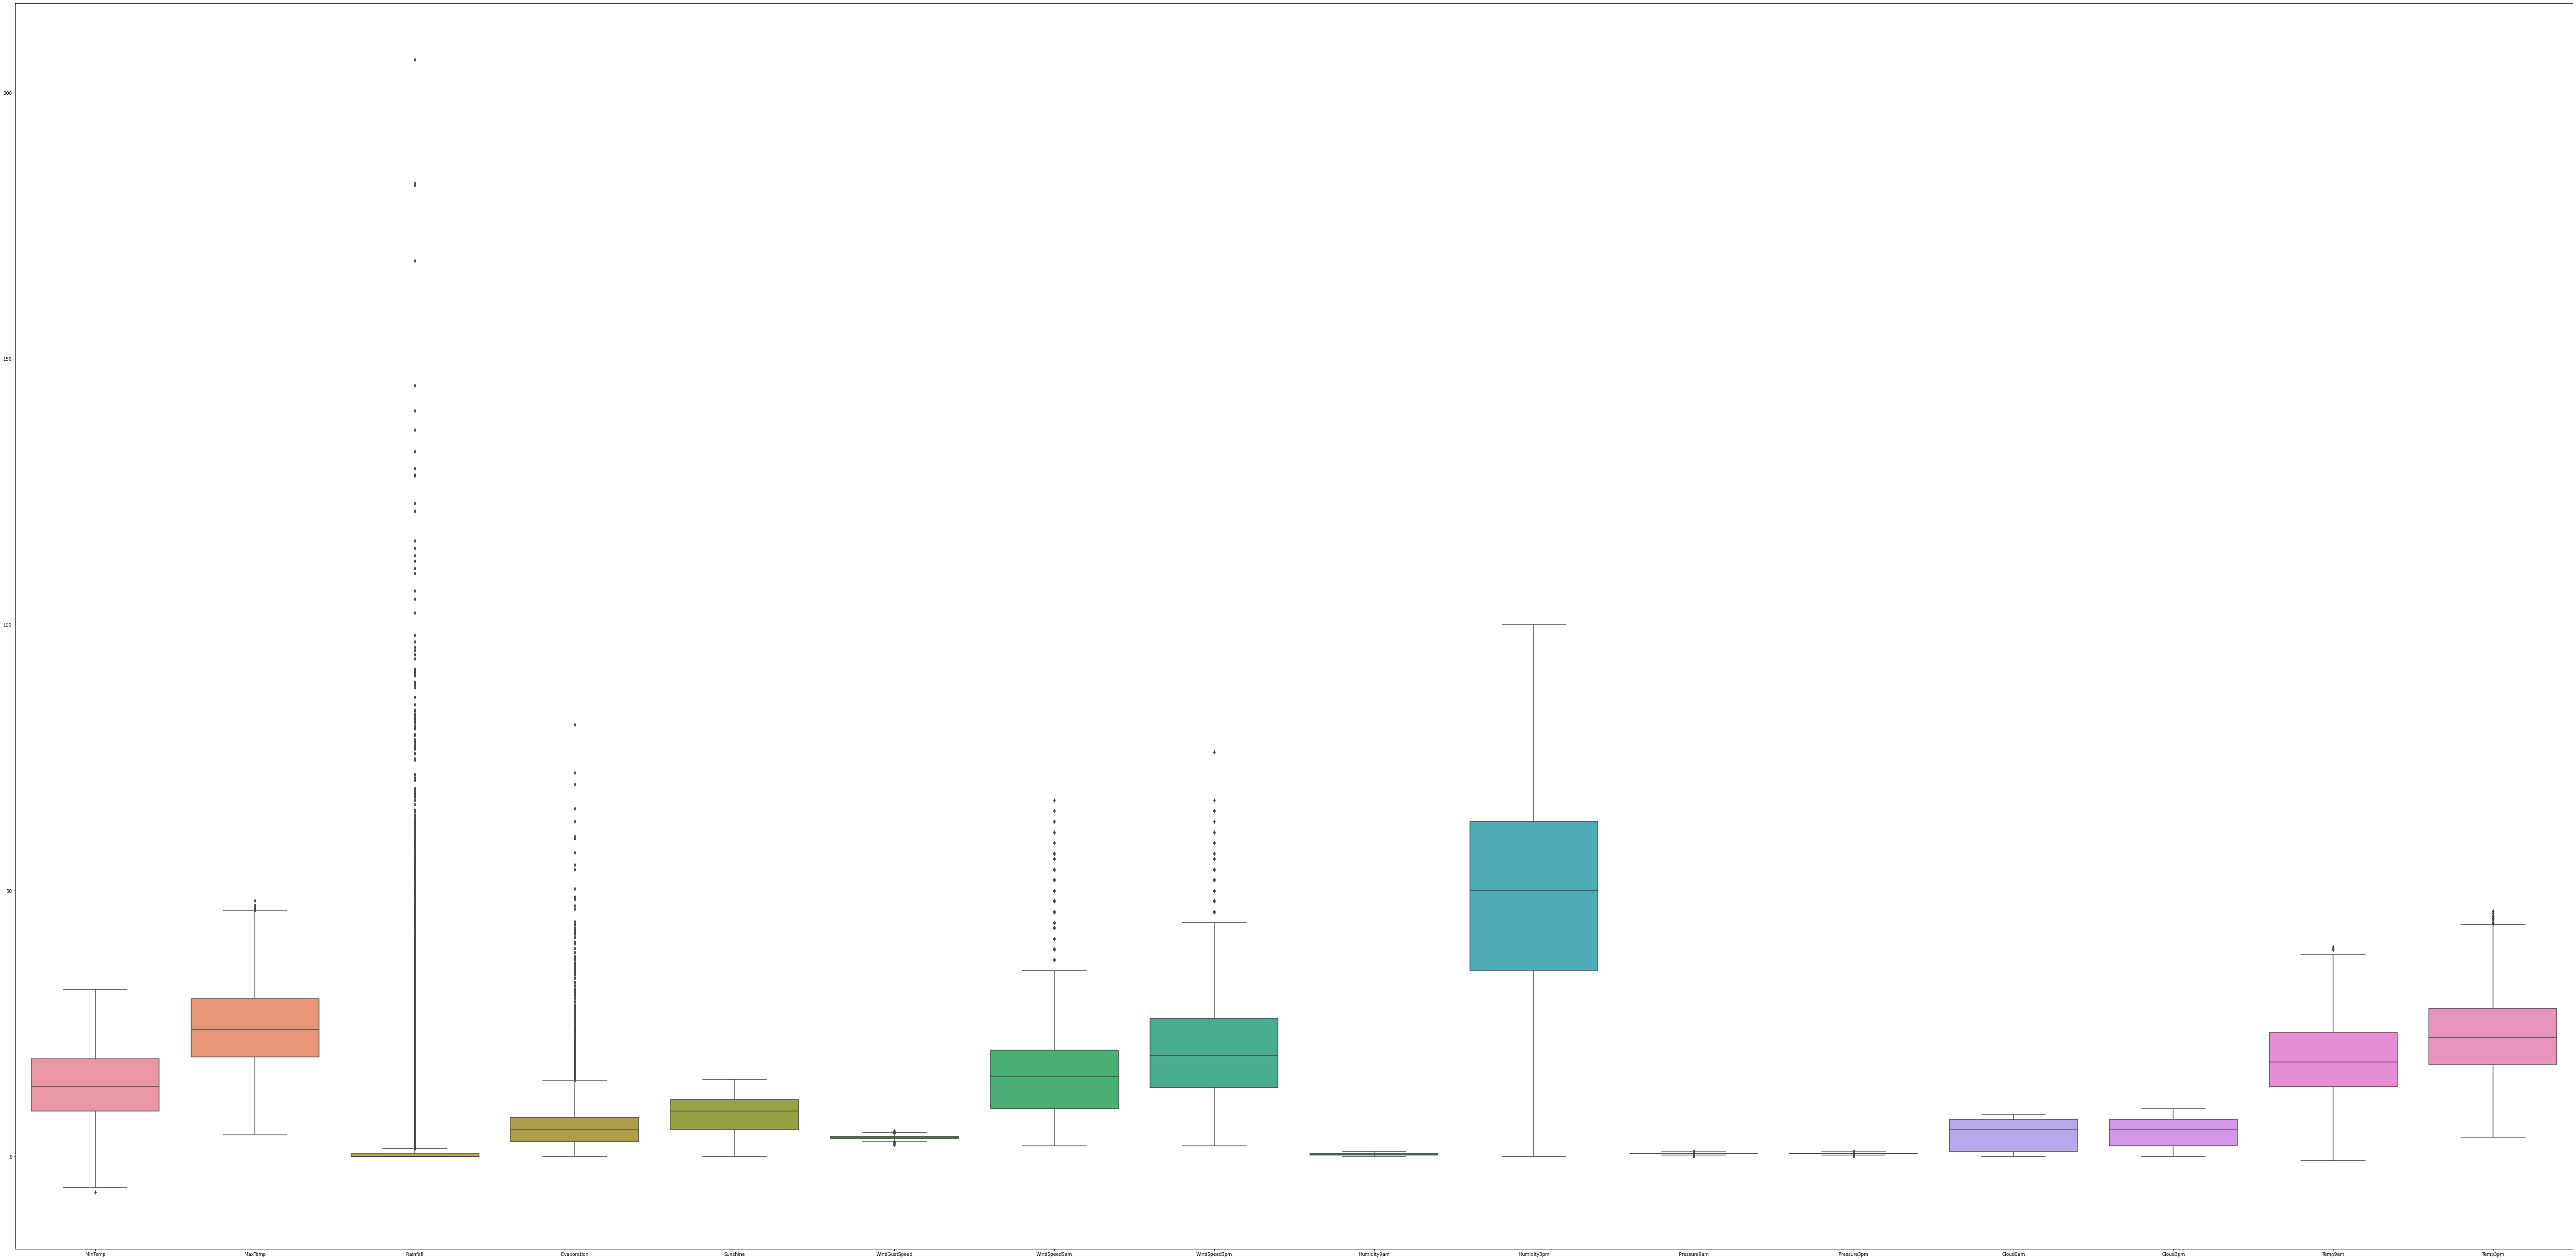

In [69]:
plt.figure(figsize=(100,50))
sns.boxplot(data=df)


***Sunshine, Humidity3pm, Pressure9am, Pressure2pm, Cloud9am, Cloud3pm dont have outliers, all other features have outliers.***

In [ ]:
# view summary statistics in numerical variables

print(round(df_short.describe()),2)

***Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm have substantial outliers.***

In [ ]:
df_short.corr()

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(16,10))
sns.heatmap(df_short[].corr(), annot=True, cmap='RdYlGn')

*   MinTemp and MaxTemp have a positive correlation and are likely to be high if the other is high too.
*   Min Temp is also likely to be high if Temp9am is high, and also Temp3pm
*   Max Temp is also likely to be high if Temp9am is high, and also Temp3pm
*   MinTemp, MaxTemp are positively correlated Evaporation
*   MinTemp, MaxTemp are negatively correlated Pressure9am, Pressure3pm
*   MaxTemp is negatively correlated to Humidity9am, Humidity3pm
*   Sunshine is negatively correlated to Humidity9am, Humidity3pm
*   Pressure9am and Pressure3pm are negatively correlated to WindGustSpeed
*   Sunshine is negatively correlated to Cloud9am, Cloud3pm
*   Humidity9am, Humidity3pm is positively correlated to Cloud9am, Cloud3pm







In [ ]:
def correlation(df, threshold):
  col_corr = list()
  corr_matrix = df.corr()
  for i in range(0,len(corr_matrix.columns)):
    #print(abs(corr_matrix.iloc[i]))
    for j in range(i):
      curr = abs(corr_matrix.iloc[i,j])
      if curr > threshold:
        col_corr.append([corr_matrix.columns[i],corr_matrix.columns[j]])
        #col_corr.append(corr_matrix.columns[i])

  return col_corr


In [ ]:
corr_independant_features = correlation(df_short[numerical_columns],0.7)
print(corr_independant_features)

In [ ]:
for features in corr_independant_features:
  features.append("RainTomorrow_Yes")
  selected_features = df_short[features]
  print(selected_features.corr())

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(16,10))
sns.heatmap(df_short.corr(), annot=True, cmap='RdYlGn')

In [ ]:
num_var = ['MinTemp', 'MaxTemp', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure3pm','Humidity3pm','Cloud9am','Cloud3pm']

In [ ]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()




# Which independent variables have missing data? How much?

In [ ]:
total = df_short.isnull().sum().sort_values(ascending=False)
percent = (df_short.isnull().sum()/df_short.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
df_short = df_short.dropna()


In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df_short['RainTomorrow_Yes'], df_short[['MaxTemp', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure3pm', 'RainTomorrow_Yes']]).fit()

# Print out the statistics
model.summary()

# Do the training and test sets have the same data?

In [ ]:
from sklearn.model_selection import  train_test_split

X = df_short[['MaxTemp', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure3pm', 'RainTomorrow_Yes']]
y = df_short['RainTomorrow_Yes']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['MaxTemp', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure3pm']]

X_val_plot = X_val[['MaxTemp', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure3pm']]

X_train_plot = X_train[['MaxTemp', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure3pm']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

# Is the predictor variables independent of all the other predictor variables?

# Which predictor variables are the most important?

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# Do the ranges of the predictor variables make sense?

# What are the distributions of the predictor variables?   


# Remove outliers and keep outliers (does if have an effect of the final predictive model)?


# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.